### Embedding With CNN Model For Sentiment Analysis
**Embedding**
    - Word embeddings are a technique for representing text where different words with similar meaning have a similar real-valued vector representation.
------------------------------------------------------------------------------

**Workflow**
 
 - Dataset
 - Data Prepration
 - Train CNN with Embedding Layer
 - Evaluate Model

**Dataset**
https://www.kaggle.com/kazanova/sentiment140

In [226]:
import pandas as pd

In [227]:
df = pd.read_csv('./dataset/tweets.csv', header = None)

In [228]:
df.shape

(1600000, 6)

In [229]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [230]:
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})

In [231]:
df.head()

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [232]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 100)

In [233]:
negativeTweets = df[df['target']==0]['content'].count()
print(negativeTweets)
neutralTweets = df[df['target']==2]['content'].count()
print(neutralTweets)
positiveTweets = df[df['target']==4]['content'].count()
print(positiveTweets)

800000
0
800000


In [234]:
df['target'] = df['target'].replace([0,4],[0,1])

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
# plt.figure(figsize=(14,7))
# common_keyword=sns.barplot(x=df[df['target']==1]['username'].value_counts()[:10].index,
#                            y=df[df['target']==1]['username'].value_counts()[:10],palette='magma')
# common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
# common_keyword.set_ylabel('Positive tweet frequency',fontsize=12)
# plt.title('Top 10 users who publish positive tweets',fontsize=16)
# plt.show()

In [237]:
# plt.figure(figsize=(14,7))
# common_keyword=sns.barplot(x=df[df['target']==0]['username'].value_counts()[:10].index,
#                            y=df[df['target']==0]['username'].value_counts()[:10],palette='magma')
# common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
# common_keyword.set_ylabel('Positive tweet frequency',fontsize=12)
# plt.title('Top 10 users who publish positive tweets',fontsize=16)
# plt.show()

In [238]:
df.drop(['id','date','query','username'], axis=1, inplace=True)

In [239]:
df.head()

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Data prepration

In [240]:
from sklearn.utils import shuffle
df = shuffle(df)

In [241]:
df = df.iloc[0:100000]

In [242]:
df.head(30)

,target,content
1148909,1,"I am really bad at this Twitter thing, but if ..."
5214,0,@ChrisInBoston Baston... that sucks dude. {...
401271,0,holy shit its already 4!! omfg what a waste of...
1514675,1,Meg joined the Pig of the Month competion htt...
1243242,1,@Azikale Are you suffering with Dave Syndrome?...
1356301,1,@Katashtrophy I'm not a gamer but I am a BOARD...
1218437,1,@SarahJacinta Thank you!
761592,0,Just finished a bag of Fritos. My head hurts
112455,0,@RespectMileyC You have school tomorrow aw t...
254181,0,I has no juice and i just vaccumed up a pink p...


In [243]:
df[df['target']==0]['target'].count(),df[df['target']==1]['target'].count()

(50020, 49980)

In [244]:
from nltk.corpus import stopwords
import string
import re
from nltk.stem.snowball import SnowballStemmer 

In [245]:
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
english_stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [246]:
def clean_data(content, stem=False):
    content = re.sub(regex, ' ', str(content).lower()).strip()
    tokens = []
    for token in content.split():
        if token not in english_stopwords:
              tokens.append(stemmer.stem(token))
    return " ".join(tokens)

In [247]:
df.content = df.content.apply(lambda x: clean_data(x))

In [248]:
df.head()

,target,content
1148909,1,realli bad twitter thing anyon would like get ...
5214,0,baston suck dude send happi thought way
401271,0,holi shit alreadi 4 omfg wast saturday
1514675,1,meg join pig month compet
1243242,1,suffer dave syndrom jump roof car loincloth


In [249]:
#df.to_csv('cleadDataset.csv', header=False, index=False) 

### Define A Vocabulary
- We can develop a vocabulary as a Counter, which is a dictionary mapping of words and their count that allows us to easily update and query. Each document can be added to the counter (a new function called add doc to vocab()) and we can step over all of the tweets in the negative directory and then the positive directory (a new function called process docs()).


In [250]:
from collections import Counter

In [251]:
def clean_tweet(doc):
    tokens = doc.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words and len(w) > 1]
    return tokens

In [252]:
# load tweets and add to vocab/dictionary
def add_to_vocab(tweets, vocab):
    #load tweet
    for x in tweets.content:
        tokens = clean_tweet(x)
        vocab.update(tokens)

In [253]:
vocab = Counter()
add_to_vocab(df, vocab)

In [254]:
len(vocab)

47125

In [255]:
# vocab.items()

In [256]:
# import json

In [257]:
# vocabToJson = json.dumps(vocab, indent = 4)   

In [258]:
# with open('dictionary.json', 'w+') as f:
#     # this would place the entire output on one line
#     # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
#     json.dump(vocabToJson, f)

In [259]:
#keep tokens with min occurences
min_occurance = 2
tokens = [k for k, c in vocab.items() if c >= min_occurance]
print(len(tokens))

17695


In [260]:
# save list to file
def save_list(lines, filename):
    #convert lines to a single blob of text
    data = '\n'.join(lines)
    #open file 
    file = open(filename,'w')
    #write text
    file.write(data)
    #close file
    file.close()

In [261]:
#save_list(tokens,'filteredDictionary.txt')

### Train CNN with Embedding Layer

A word embedding is a way of representing text where each word in
the vocabulary is represented by a real valued vector in a high-dimensional space. The vectors
are learned in such a way that words that have similar meanings will have similar representation
in the vector space (close in the vector space). This is a more expressive representation for text
than more classical methods like bag-of-words, where relationships between words or tokens are
ignored, or forced in bigram and trigram approaches.


The real valued vector representation for words can be learned while training the neural
network. We can do this in the Keras deep learning library using the Embedding layer. The
first step is to load the vocabulary. We will use it to filter out words from tweets that
we are not interested in.

In [262]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [263]:
vocab_file = 'filteredDictionary.txt'
vocab = load_doc(vocab_file)
vocab = set(vocab.split())

In [264]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer


In [265]:
max_length = max([len(s.split()) for s in df.content])
print('Maximum length: %d' % max_length)


Maximum length: 34


In [266]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded


In [267]:
from keras.preprocessing.text import Tokenizer

In [268]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.content)
vocab_size = len(tokenizer.word_index) + 1

In [269]:
# define vocabulary size
print('Vocabulary size: %d' % vocab_size)


Vocabulary size: 47204


In [270]:
from sklearn.model_selection import train_test_split

In [271]:
train, test = train_test_split(df, test_size = 0.3, random_state = 4)

In [272]:
print('train dataset size: {}'.format(train.shape))
print('test dataset size: {}'.format(test.shape))

train dataset size: (70000, 2)
test dataset size: (30000, 2)


In [273]:
train = shuffle(train)

In [274]:
test = shuffle(test)

### Define Model

In [275]:
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam

In [276]:
train_sequences = tokenizer.texts_to_sequences(train.content)
test_sequences = tokenizer.texts_to_sequences(test.content)

In [277]:
X_train =  pad_sequences(train_sequences, maxlen = max_length, padding = 'post')
X_test = pad_sequences(test_sequences, maxlen = max_length, padding = 'post')

In [294]:
def encode_tweet(tokenizer, max_length, tweet):
    encoded = tokenizer.texts_to_sequences(tweet)
    padded = pad_sequences(train_sequences, maxlen = max_length, padding = 'post')
    return padded

In [278]:
X_train

array([[  63,  258,    0, ...,    0,    0,    0],
       [ 380,   25, 1447, ...,    0,    0,    0],
       [ 113,   36,    0, ...,    0,    0,    0],
       ...,
       [   1,   49,    0, ...,    0,    0,    0],
       [ 777,  826,   74, ...,    0,    0,    0],
       [   7,   16,   42, ...,    0,    0,    0]])

In [279]:
X_train.shape

(70000, 34)

In [280]:
Y_train = train.target.values # np array
Y_test = test.target.values

In [281]:
Y_train[0:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [282]:
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
    # summarize defined model
    model.summary()
    return model

In [292]:
model = define_model(vocab_size, max_length)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 100)           4720400   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 27, 32)            25632     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 416)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4170      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 4,750,213
Trainable params: 4,750,213
Non-trainable params: 0
____________________________________________

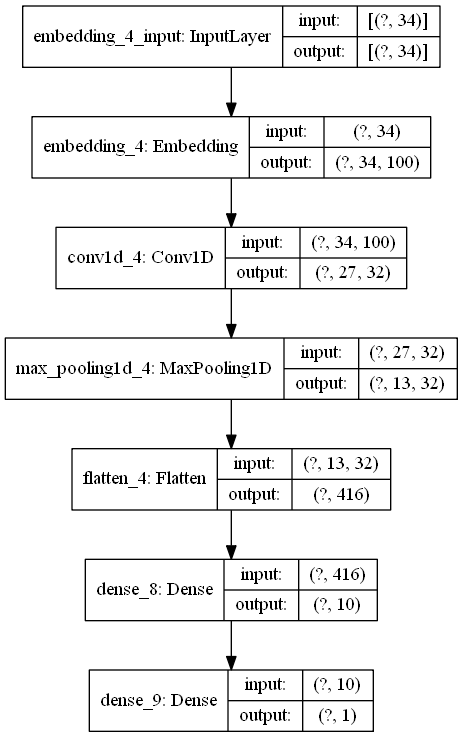

In [293]:
import pydot
import graphviz
tf.keras.utils.plot_model(model, show_shapes=True)

In [285]:
history = model.fit(X_train, Y_train, batch_size = 256, epochs=10, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/10
274/274 - 25s - loss: 0.5730 - accuracy: 0.6854 - val_loss: 0.4990 - val_accuracy: 0.7583
Epoch 2/10
274/274 - 22s - loss: 0.4290 - accuracy: 0.8070 - val_loss: 0.5077 - val_accuracy: 0.7558
Epoch 3/10
274/274 - 22s - loss: 0.3175 - accuracy: 0.8673 - val_loss: 0.5645 - val_accuracy: 0.7424
Epoch 4/10
274/274 - 24s - loss: 0.2138 - accuracy: 0.9161 - val_loss: 0.6754 - val_accuracy: 0.7292
Epoch 5/10
274/274 - 23s - loss: 0.1524 - accuracy: 0.9417 - val_loss: 0.7791 - val_accuracy: 0.7180
Epoch 6/10
274/274 - 23s - loss: 0.1154 - accuracy: 0.9569 - val_loss: 0.8915 - val_accuracy: 0.7142
Epoch 7/10
274/274 - 23s - loss: 0.0926 - accuracy: 0.9654 - val_loss: 0.9873 - val_accuracy: 0.7068
Epoch 8/10
274/274 - 22s - loss: 0.0768 - accuracy: 0.9709 - val_loss: 1.0947 - val_accuracy: 0.7045
Epoch 9/10
274/274 - 22s - loss: 0.0646 - accuracy: 0.9755 - val_loss: 1.2009 - val_accuracy: 0.7018
Epoch 10/10
274/274 - 26s - loss: 0.0552 - accuracy: 0.9790 - val_loss: 1.3658 - val_accura

In [286]:
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

In [287]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     15123
           1       0.69      0.70      0.70     14877

    accuracy                           0.70     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.70      0.70      0.70     30000



In [288]:
import matplotlib.pyplot as plt

In [289]:
_, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Training Accuracy : %f ' %(acc*100))

Training Accuracy : 98.351431 


In [290]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Testing Accuracy : %f ' %(acc*100))

Testing Accuracy : 69.716668 


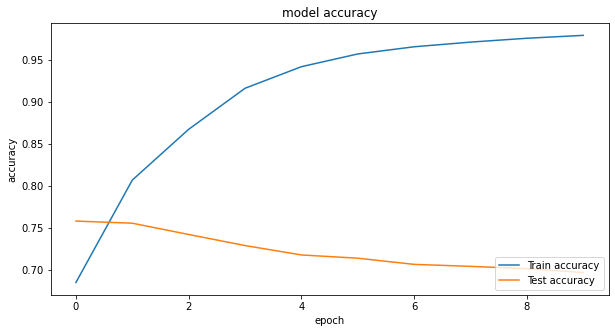

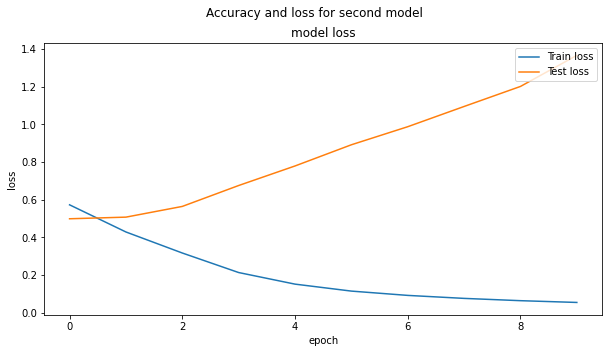

In [291]:
#History for accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()
# History for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

In [356]:
def predict_sentiment(review, vocab, tokenizer, max_length, model):
    line = clean_data(review, stem = True)
    padded = encode_tweet(tokenizer,max_length, review)
    yhat = model.predict(padded, verbose = 0)
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), "Negative"
    return percent_pos, 'Positive'

In [357]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 8ADB-680F

 Directory of C:\Users\dell\Desktop\Machine Learning\Project Twitter Sentiment Analysis

17-03-2021  21:48    <DIR>          .
17-03-2021  21:48    <DIR>          ..
17-03-2021  12:05    <DIR>          .ipynb_checkpoints
16-03-2021  20:35               355 app.py
17-03-2021  12:51        68,440,533 cleadDataset.csv
17-03-2021  12:29    <DIR>          dataset
17-03-2021  13:45         6,212,519 dictionary.json
12-03-2021  13:50             8,901 download.jpg
17-03-2021  13:50           840,869 filteredDictionary.txt
14-06-2020  18:44       347,116,733 glove.6B.100d.txt
12-03-2021  17:27       137,847,651 glove100dimentional.zip
17-03-2021  19:46            32,055 model.png
12-03-2021  22:32                39 README.md
17-03-2021  15:23           122,411 Twitter Sentiment Analysis.ipynb
12-03-2021  22:09            11,149 Twitter Sentiment Analysis.py
17-03-2021  21:48           150,511 Untitled.ipynb
              12 File(s)  

In [358]:
vocab_filename = 'filteredDictionary.txt'

In [359]:
vocab = load_doc(vocab_filename)

In [360]:
type(train)

pandas.core.frame.DataFrame

In [361]:
train.shape

(70000, 2)

In [362]:
train.head()

,target,content
609352,0,sorri anyth
294026,0,heart amp prayer go passeng amp famili air fra...
1037682,1,alway look
1344115,1,loveeee kobe highest trend topic kobe kobe kobe
1293327,1,


In [363]:
def create_tokenizer(train):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train.content)
#     vocab_size = len(tokenizer.word_index) + 1
    return tokenizer

In [364]:
trainTokenizer = create_tokenizer(train)
testTokenizer = create_tokenizer(test)

In [365]:
vocab_size = len(trainTokenizer.word_index) + 1
vocab_size

37606

In [368]:
max_length1 = max([len(s.split()) for s in train.content])
print(max_length1)

33


In [369]:
max_length2 = max([len(s.split()) for s in test.content])
print(max_length2)

34


In [370]:
max_length =max_length2

In [371]:
Xtrain = encode_docs(tokenizer, max_length, train.content)

In [372]:
Xtest = encode_docs(tokenizer, max_length, test.content)

In [374]:
ytrain=train['target']
ytest = test['target']

In [ ]:
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
